In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 


In [2]:
data = {
    "valuationDate": "2012-04-30",
    "endOfMonth": True,
    "zeroRates": {
        "analysisDates": [],
        "compounding": "Continuous",
        "frequency": "Semiannual",
        "dayCounter": "Actual360"
    },
    "collateralCurve": {
        "settlementDays": 2,
        "intpMethod": "LOGLINEAR",
        "currency": "USD",
        "calendar": "UnitedStates",
        "dayCounter": "Actual360",
        "period": "3M",
        "instruments": {
            "OIS": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360",
                "frequency": "Annual"
            }
        }
    },
    "yieldCurve": {
        "settlementDays": 2,
        "intpMethod": "LOGLINEAR",
        "currency": "USDTRY",
        "calendar": "TARGET",
        "dayCounter": "Actual360",
        "period": "3M",
        "instruments": {
            "FWD": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360"
            }
        }
    },
     "spot": 1.7572,
     "yieldData": yielddata.to_dict('r')
}

try:
    result = api.createTask(CalculationType.YIELD_CURVE, data,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()



In [3]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

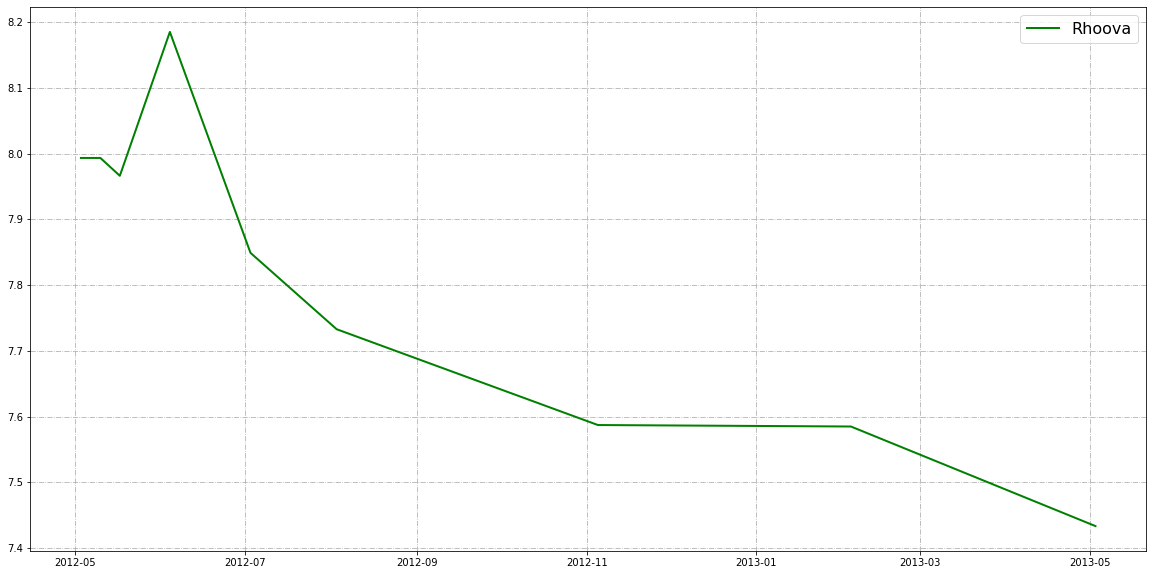

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y = list(rhoovayieldcurvedicts.values())


ax.plot(x,y, 'g', label='Rhoova', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

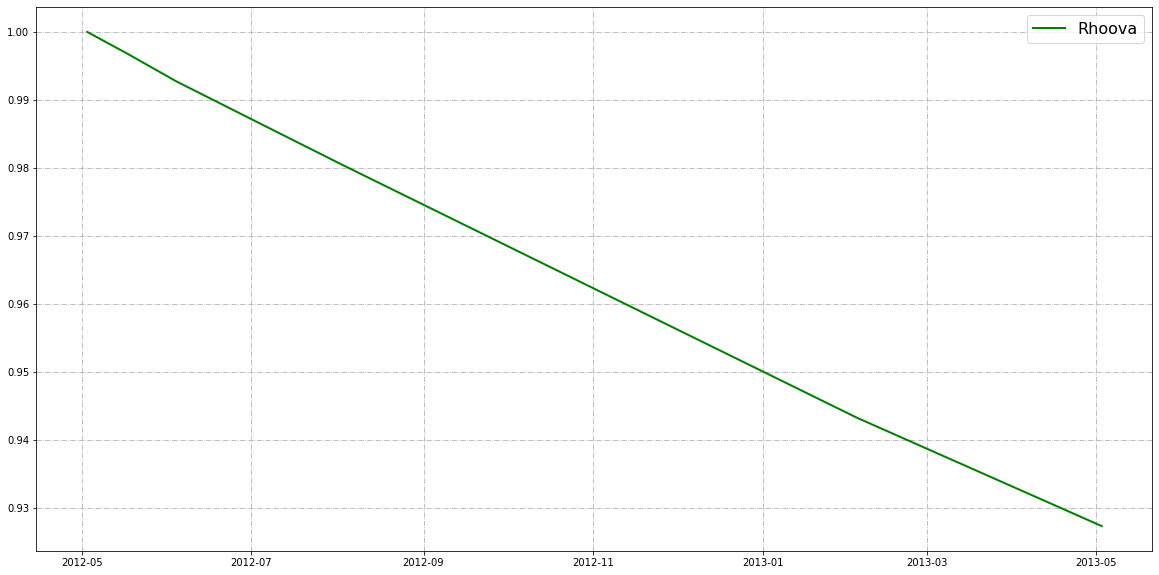

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvediscounts.keys())
y = list(rhoovayieldcurvediscounts.values())

ax.plot(x,y, 'g', label='Rhoova', linewidth=2)

leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [6]:
pTable = pt.PrettyTable(['Maturity','Rhoova ZeroRates','Rhoova Discount Rate'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key, val,rhoovayieldcurvediscounts.get(key)])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------------+----------------------+
|  Maturity  | Rhoova ZeroRates | Rhoova Discount Rate |
+------------+------------------+----------------------+
| 2012-05-03 |     7.993658     |          1           |
| 2012-05-10 |     7.993658     |       0.998447       |
| 2012-05-17 |     7.966512     |       0.996907       |
| 2012-06-04 |     8.185507     |       0.992750       |
| 2012-07-03 |     7.849221     |       0.986788       |
| 2012-08-03 |     7.732963     |       0.980432       |
| 2012-11-05 |     7.587136     |       0.961558       |
| 2013-02-04 |     7.584898     |       0.943309       |
| 2013-05-03 |     7.433310     |       0.927404       |
+------------+------------------+----------------------+
